# Project: Investigating Medical Appointments in Brazil

## Introduction

For this project I will be investigating the dataset that has the information from over 100,000 medical appointments in Brazil which focuses on whether or not an individual turns up to their appointment. Here I will be investigating whether or not some variables affect whether or not a patient turns up:
* Does Gender affect whether the individual shows up?
* Does ailments affect No show?
* Are Younger People more likely to show up?

In [88]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

%matplotlib inline

In [89]:
#importing dataset
df=pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Wrangling

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [91]:
df.shape

(110527, 14)

Using .info() and .shape functions, you are able to see that there are 110,257 entries, 14 columns and the various data types within the dataset. For example, We can see that:
* Gender is an Object/String
* ScheduledDay is an Object/String
* Diabetes in an integer
* No-show is an Object/String 

Based on the initial viewing, there are a few things that caught my eye:
* Some column names require changing
* Some column date types need to be amended
* There is no NaN values currently at present based on .info()

In the next part, I will check for null values, duplicates and any strange values.

In [92]:
#double checking null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

My initial assumption was right, there are no null values within the dataset across all columns. Next, I want to check any duplicates - this initial screening will check for duplicate rows where each entry in each column is the same.

In [93]:
#initial check for duplicates
df.duplicated().sum()

0

There are no duplicate rows, however this function does not take into account duplicates in single rows. Based on the data, I know there will be duplicates across some of the columns like Gender, Age and Diabetes. For some columns, the values are either 1 or 0 to represent True or False. For me, something to look out for is whether duplicates appear within PatientId and AppointmentID.

In [94]:
#Duplicates within PatientId
df['PatientId'].duplicated().sum()

48228

In [95]:
#Duplicates within AppointmentID
df['AppointmentID'].duplicated().sum()

0

There are 48,228 duplicates within PatientId and none in AppointmentID. The duplicates within PatientId could be due the individual having multiple appointments and as there is no duplicates within AppointmentID this helps my assumption.

Next, I want to look at the unique values within each column just to ensure there isn't anything out of the ordinary:

In [96]:
#Unique Values within each column
print('Gender: ', df['Gender'].unique())
print('Neighbourhood: ', df['Neighbourhood'].unique())
print('Scholarship: ', df['Scholarship'].unique())
print('Hypertension: ',df['Hipertension'].unique())
print('Age: ',sorted(df['Age'].unique()))
print('Diabetes: ',df['Diabetes'].unique())
print('Alcoholism: ',df['Alcoholism'].unique())
print('NoShow: ',df['No-show'].unique())
print('Disabled: ',df['Handcap'].unique())
print('SMS Received: ',df['SMS_received'].unique())

Gender:  ['F' 'M']
Neighbourhood:  ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'I

Most of the columns have two possible outcomes:
* Gender - M or F
* Scholarship/Diabetes/Alcoholism/SMS_received/Hipertension - 0 or 1, (False/True)
* No-show - No or Yes

For Disability ('Handcap' within dataset) as four possible outcomes, I'm assuming this would be a scale of the individuals ability.  

Looking at Age, we can see that there is -1 which will be taken out. It is possible for someone to live to 102, however 115 seems to be an outlier. After a quick search online, [Wikipedia](https://en.wikipedia.org/wiki/List_of_supercentenarians_by_continent#South_American_supercentenarians) page hows supercentarians by continent. Whilst possible that someone in Brazil can leave to 115 years old, at the time the data is reflecting there would be noone of this age and hence will discount this.

In [97]:
#Discounting Patient with negative age
df = df[df.Age >= 0]

In [98]:
#Discounting Age > 110
df = df[df.Age <= 110]

All possible strange values have been excluded from the dataset, however there is some changes still need to be made. Now to clean up column names and dtypes.

In [99]:
#Changing PatientId to integer
df['PatientId']=df['PatientId'].astype(int)
df['PatientId'].dtype

dtype('int64')

In [100]:
#Changing ScheduledDay to AppointmentDay
df['ScheduledDay']=df['ScheduledDay'].apply(np.datetime64)
df['AppointmentDay']=df['AppointmentDay'].apply(np.datetime64)

In [101]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110521 non-null  int64         
 1   AppointmentID   110521 non-null  int64         
 2   Gender          110521 non-null  object        
 3   ScheduledDay    110521 non-null  datetime64[ns]
 4   AppointmentDay  110521 non-null  datetime64[ns]
 5   Age             110521 non-null  int64         
 6   Neighbourhood   110521 non-null  object        
 7   Scholarship     110521 non-null  int64         
 8   Hipertension    110521 non-null  int64         
 9   Diabetes        110521 non-null  int64         
 10  Alcoholism      110521 non-null  int64         
 11  Handcap         110521 non-null  int64         
 12  SMS_received    110521 non-null  int64         
 13  No-show         110521 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

We can see that PatientId, ScheduledDay and AppointmentDay have been amended to their new dtypes. 

To change column names, will be using .rename function within pandas.

In [113]:
#Changing Column Names
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Disabled'},inplace=True)

## Exploratory Data Analysis

I posed three questions at the beginning:
* Is an individual more likely to show up if they are Male or Female?
* Do Health Concerns affect No show?
* Are younger people more likely to show up?

### Question 1: Is an individual more likely to show up if they are Male or Female?

To begin with, I want to see if the likelihood of an individual showing up to their appointment is affected by their gender. Let's start with seeing how many entries are male and female.

In [114]:
#Split between Male and Female
df['Gender'].value_counts()

F    71834
M    38687
Name: Gender, dtype: int64

In [115]:
#Assigning Value counts to Male and Female
female = df[df['Gender']== 'F']['PatientId'].count()
male = df[df['Gender']=='M']['PatientId'].count()
print(female,male)

71834 38687


Text(0, 0.5, 'Number of Patients')

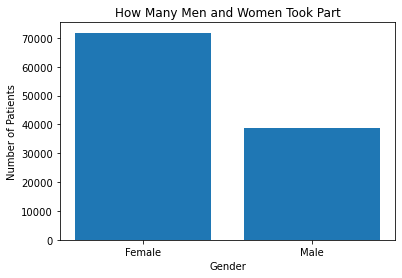

In [116]:
#Plotting Value Counts of Male and Female
plt.bar(['Female','Male'],[female,male])
plt.title('How Many Men and Women Took Part')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')

In [117]:
#Gender Proportions
propFemale = female / (female+male)
propMale= male / (female+male)

Text(0, 0.5, 'Proportion of Patients')

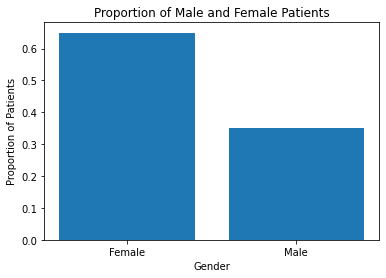

In [118]:
#Plotting Gender Proportions
plt.bar(['Female','Male'],[propFemale,propMale])
plt.title('Proportion of Male and Female Patients')
plt.xlabel('Gender')
plt.ylabel('Proportion of Patients')

There is no difference between proportion and value counts graphs of Genders. Women are twice as likely to make medical appointments than males. Does this translate to their likelihood of showing up? To see this I will need to import seaborn (Used the example [here](https://stackoverflow.com/questions/46223224/matplotlib-plot-countplot-for-two-or-more-column-on-single-plot) to help).

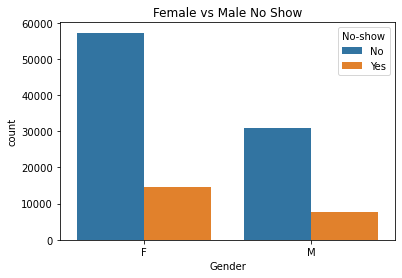

In [119]:
#Count Plot split by Gender and No-Show. No means individual turned up and Yes means No-Show
import seaborn as sns
sns.countplot(x='Gender',hue='No-show',data=df)
plt.title('Female vs Male No Show')
plt.show()

In [120]:
#Counting Number of Males and Women by No-Show outcome
df.groupby(['Gender','No-show'])['No-show'].count()

Gender  No-show
F       No         57243
        Yes        14591
M       No         30962
        Yes         7725
Name: No-show, dtype: int64

About 20.0% of Males did not show up to their appointments whereas 20.3% of Women who had an appointment did not show up. These values are very similar so we can assume that Gender does not affect the likelihood of an individual showing up.

### Question 2: Does Health Concerns affect likelihood of showing up?

Particular health concerns require more hospital visits than others, for example Hypertension (also known was High Blood Pressure) if unmanaged can cause stroke or heart failure. If a patient has more than one health concern this would mean that the individual would be required to attend appointments. 

In [126]:
#Adding Column that will reflect if Patient has more than one health concern (ie > 1)
df['No. HC']=df['Hypertension']+df['Diabetes']+df['Alcoholism']+df['Disabled']

In [127]:
#making sure column is there
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,No-show,No. HC
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2


In [133]:
#obtaining new dataframe with only health concern columns
df1=df.iloc[:,8:]
df1

,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,No-show,No. HC
0,1,0,0,0,0,No,1
1,0,0,0,0,0,No,0
2,0,0,0,0,0,No,0
3,0,0,0,0,0,No,0
4,1,1,0,0,0,No,2
...,...,...,...,...,...,...,...
110522,0,0,0,0,1,No,0
110523,0,0,0,0,1,No,0
110524,0,0,0,0,1,No,0
110525,0,0,0,0,1,No,0


<AxesSubplot:xlabel='Disabled', ylabel='count'>

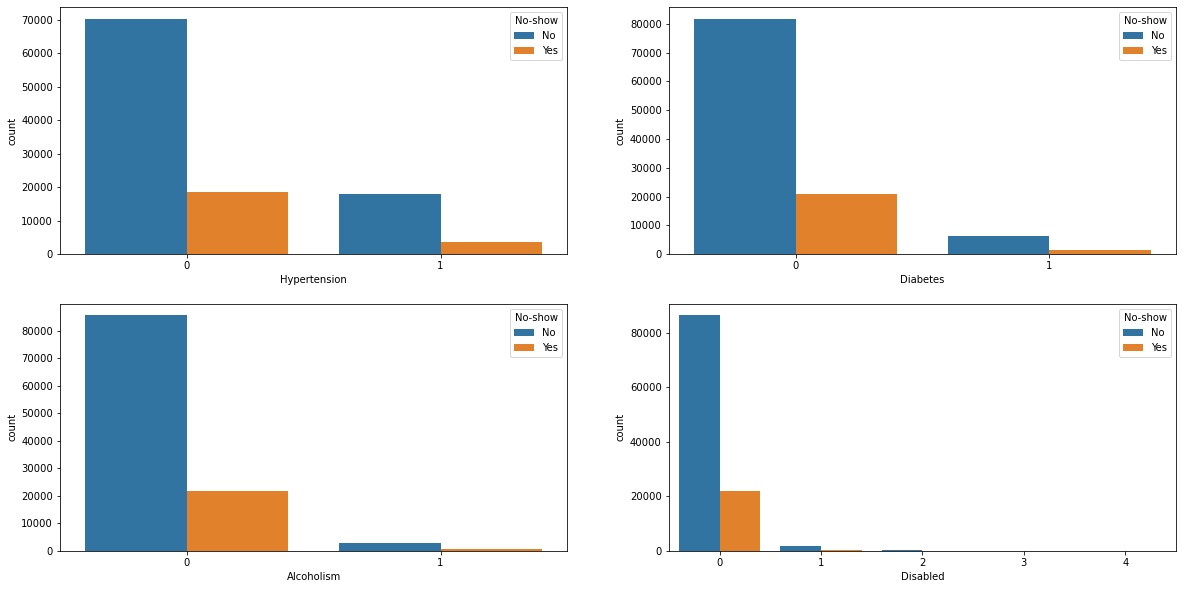

In [138]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(df1['Hypertension'],hue=df1['No-show'])
plt.subplot(2,2,2)
sns.countplot(df1['Diabetes'],hue=df1['No-show'])
plt.subplot(2,2,3)
sns.countplot(df1['Alcoholism'],hue=df1['No-show'])
plt.subplot(2,2,4)
sns.countplot(df1['Disabled'],hue=df1['No-show'])

<AxesSubplot:xlabel='No. HC', ylabel='count'>

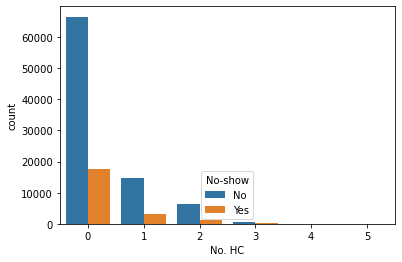

In [139]:
sns.countplot(df1['No. HC'],hue=df1['No-show'])

Overall, there are more patients without any major health concerns that those 1 or more. Most individuals turn up to their appointments, however might be worth seeing if particular ailments affect no show.

In [144]:
#Creating a subset of those who did not show up to their appointments
df2=df1[df1['No-show']=='Yes']

In [145]:
df2.describe()

,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,No. HC
count,22316.000000,22316.00000,22316.000000,22316.000000,22316.000000,22316.000000
mean,0.169027,0.06408,0.030337,0.020165,0.438430,0.283608
std,0.374784,0.24490,0.171517,0.156268,0.496206,0.601069
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.00000,1.000000,4.000000,1.000000,5.000000


In [146]:
df2.groupby('No-show').sum()

,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,No. HC
No-show,,,,,,
Yes,3772,1430,677,450,9784,6329


All of the means are low, however mean of Hypertension is considerably higher than the other health concerns. We could say that if a Patient is suffering from hypertension they are more likely not to turn up to their appointments compared to the other concerns. We have to remember that a large proportion of people have no health concerns and not show up meaning this has made the mean very low. 

In [154]:
#Removing All entries with no concerns (No. HC not equal to 0)
df3=df2[df2['No. HC']!= 0]
df3.describe()

,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,No. HC
count,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000,4713.000000
mean,0.800339,0.303416,0.143645,0.095481,0.405050,1.342881
std,0.399788,0.459782,0.350767,0.329323,0.490954,0.536824
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000


In [155]:
df3.groupby(['No-show','No. HC'])['No. HC'].sum()

No-show  No. HC
Yes      1         3230
         2         2728
         3          318
         4           48
         5            5
Name: No. HC, dtype: int64

Out of all the individuals with health concerns, just over half only has one concern. Therefore, we can assume that having one health concern would make you more likely not to show up to appointments.

In [156]:
#Now looking at those with one concern
df4=df2[df2['No. HC']==1]
df4.describe()

,Hypertension,Diabetes,Alcoholism,Disabled,SMS_received,No. HC
count,3230.000000,3230.000000,3230.000000,3230.000000,3230.000000,3230.0
mean,0.719814,0.084520,0.128793,0.066873,0.419505,1.0
std,0.449159,0.278209,0.335022,0.249841,0.493554,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [159]:
#counts of each columns
hyperten=df4['Hypertension'].sum()
diab=df4['Diabetes'].sum()
disab=df4['Disabled'].sum()
alcoh=df4['Alcoholism'].sum()

Text(0, 0.5, 'Number of No-shows')

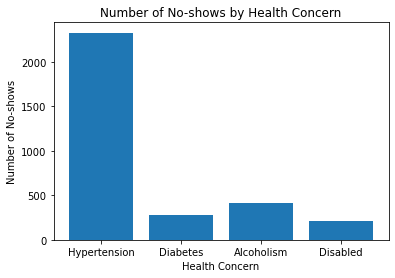

In [162]:
#Bar Chart of counts
plt.bar(['Hypertension','Diabetes','Alcoholism','Disabled'],[hyperten,diab,alcoh,disab])
plt.title('Number of No-shows by Health Concern')
plt.xlabel('Health Concern')
plt.ylabel('Number of No-shows')

If you are suffering from Hypertension you are more likely not to show up to your appointment than those who have Diabetes, Alcoholism and a disability.

### Question 3: Are Younger People more likely to show up?

It can be assumed that young people are becoming more aware of their health and wellbeing, whether this be exercise regularly, not smoking, healthy eating as some examples. 

<AxesSubplot:>

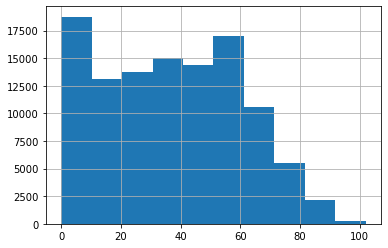

In [164]:
#Histogram of Ages
df['Age'].hist()

Here, we can see that majority of patients are under 60, however ages are quite well distributed. Now put ages into bins/categories with help from this [StackOverflow](https://stackoverflow.com/questions/49382207/how-to-map-numeric-data-into-categories-bins-in-pandas-dataframe):

In [166]:
#Categorising Age of Patients
bins=[0,2,18,35,60,np.inf]
names=['<2','2-17','18-34','35-59','60+']

df['AgeRange']=pd.cut(df['Age'],bins,labels=names)

Text(0.5, 1.0, 'Number of Patients by AgeRange and No-show')

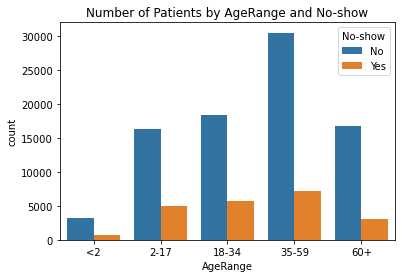

In [168]:
#Countploy of Age Range and No-show
sns.countplot(df['AgeRange'],hue=df['No-show'])
plt.title('Number of Patients by AgeRange and No-show')

This plot shows that majority of patients turn up to appointments regardless of their age. Age group 35-59 showed up to more appointments then any other age group and also had the most no shows. 

In [171]:
df.groupby(['AgeRange','No-show'])['PatientId'].count()

AgeRange  No-show
<2        No          3224
          Yes          667
2-17      No         16395
          Yes         5041
18-34     No         18384
          Yes         5753
35-59     No         30548
          Yes         7213
60+       No         16754
          Yes         3003
Name: PatientId, dtype: int64

In [190]:
#To find proportions need to find totals of each age range.
total2=len(df[df['AgeRange']=='<2'])
total2_17=len(df[df['AgeRange']=='2-17'])
total18_34=len(df[df['AgeRange']=='18-34'])
total35_59=len(df[df['AgeRange']=='35-59'])
total60=len(df[df['AgeRange']=='60+'])

In [191]:
#Now for how many no shows per age group
no_less2=len(df[(df['AgeRange']=='<2')&(df['No-show']=='Yes')])
no_2_17=len(df[(df['AgeRange']=='2-17')&(df['No-show']=='Yes')])
no_18_34=len(df[(df['AgeRange']=='18-34')&(df['No-show']=='Yes')])
no_35_59=len(df[(df['AgeRange']=='35-59')&(df['No-show']=='Yes')])
no_60=len(df[(df['AgeRange']=='60+')&(df['No-show']=='Yes')])

total=len(df)
print(total)

110521


In [193]:
#Proportions
print('Less than 2years and Did not show: ',no_less2/total2)
print('Between 2years and 17years and Did not show: ',no_2_17/total2_17)
print('Between 18 and 34 years and did not show: ',no_18_34/total18_34)
print('Between 35 and 59 years and did not show: ',no_35_59/total35_59)
print('Over the age of 60 and did not show: ',no_60/total60)

Less than 2years and Did not show:  0.1714212284759702
Between 2years and 17years and Did not show:  0.23516514275051315
Between 18 and 34 years and did not show:  0.2383477648423582
Between 35 and 59 years and did not show:  0.1910171870448346
Over the age of 60 and did not show:  0.15199676064179785


From this, 23.8% of 18-34 year olds did not show up to their appointments which is closely followed by those between 2 and 17 years old (23.5%). Individuals who are over the age of 60 are more likely to show up to appointments. Even though people under the age of 60 are more likely to have appointments, they are more likely not to show.

## Conclusion

Through this investigation, I set out to answer the following questions:
* Does Gender affect whether an individual shows up?
* Do ailments affect no shows?
* Are Younger people more likely to show up?

Based on my analysis I can assume that Gender does not affect whether an individual shows up or not to their apppointment, however Women are more likely to have appointments then men. 

The data suggests that patients mostly turn up to their appointments - most of them having no health concerns. However, you can assume those with one health condition are more likely to miss an appointment than those with 2 or more. 

Lastly, the data suggests that younger people are more likely to have an appointment but also more likely to not show up.